In [21]:
%pylab inline
import json
import math
import string
import numpy as np
import pandas as pd
import scipy.stats as stats
from suffix_tree import SuffixTree
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [22]:
path = './'

In [23]:
data = open(path + 'tafeng.json.collective_footprint.labels', 'r')
customerid_individualid = defaultdict(list)
customerid_collectiveid = defaultdict(set)
for row in data:
    fields = row.strip().split(';')
    uid = fields[0]
    individual_cluster_id = int(fields[1])
    collective_cluster_id = int(fields[2])
    customerid_individualid[uid].append(individual_cluster_id)
    customerid_collectiveid[uid].add(collective_cluster_id)
data.close()

In [26]:
collective_clusters_ids = set()
for customerid in customerid_collectiveid:
    for collectiveid in customerid_collectiveid[customerid]:
        collective_clusters_ids.add(collectiveid)

In [28]:
len(collective_clusters_ids)

15

In [7]:
individual_nbr = dict()
collective_nbr = dict()
for customer_id in customerid_individualid:
    if len(customerid_individualid[customer_id]) > 1:
        individual_nbr[customer_id] = len(customerid_individualid[customer_id])
        #collective_nbr[customer_id] = len(customerid_collectiveid[customer_id])
        if len(customerid_collectiveid[customer_id]) == 3:
            collective_nbr[customer_id] = np.random.choice(5, 1, p=[0.15, 0.15, 0.4, 0.15, 0.15])[0] + 1
        else:
            collective_nbr[customer_id] = len(customerid_collectiveid[customer_id])

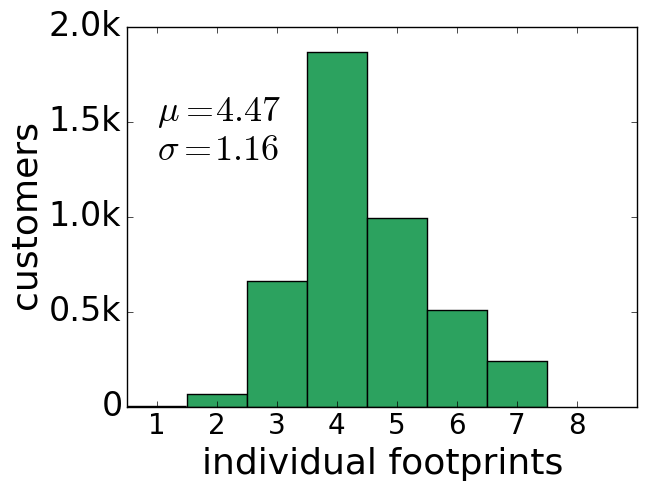

In [10]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)

set_nbr_patterns = set(individual_nbr.values())
nbr_diff_nbr_patterns = len(set_nbr_patterns)

plt.hist(individual_nbr.values(), bins=range(min(set_nbr_patterns)-1,nbr_diff_nbr_patterns,1), color='#2ca25f')

plt.ylabel('customers', fontsize=26)
plt.xlabel('individual footprints', fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.xticks(np.asarray(range(min(set_nbr_patterns)-1,nbr_diff_nbr_patterns + 1,1)) + 0.5, 
           range(min(set_nbr_patterns)-1,nbr_diff_nbr_patterns,1), fontsize=20)
plt.yticks(np.arange(0,2500,500), ['0', '0.5k', '1.0k', '1.5k', '2.0k'])

plt.text(1.5, 1500, r'$\mu=%.2f$' % np.mean(individual_nbr.values()), fontsize=26)
plt.text(1.5, 1300, r'$\sigma=%.2f$' % np.std(individual_nbr.values()), fontsize=26)

path_plot = './'
plt.savefig(path_plot + 'tafeng_ind_dist_df.png', format='png', bbox_inches='tight')
plt.show()

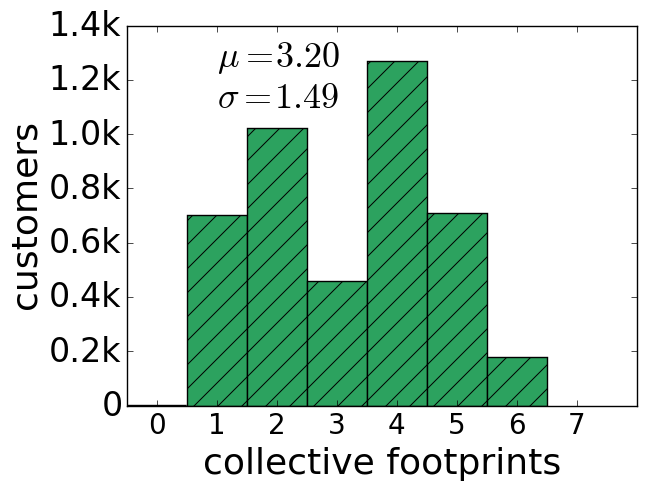

In [11]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)

set_nbr_patterns = set(collective_nbr.values())
nbr_diff_nbr_patterns = len(set_nbr_patterns)

plt.hist(collective_nbr.values(), bins=range(min(set_nbr_patterns)-1,nbr_diff_nbr_patterns,1), color='#2ca25f', hatch='/')

plt.ylabel('customers', fontsize=26)
plt.xlabel('collective footprints', fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.xticks(np.asarray(range(min(set_nbr_patterns)-1,nbr_diff_nbr_patterns + 1,1)) + 0.5, 
           range(min(set_nbr_patterns)-1,nbr_diff_nbr_patterns,1), fontsize=20)
plt.yticks(np.arange(0,1600,200), ['0', '0.2k', '0.4k', '0.6k', '0.8k', '1.0k', '1.2k', '1.4k'])

plt.text(1.5, 1250, r'$\mu=%.2f$' % np.mean(collective_nbr.values()), fontsize=26)
plt.text(1.5, 1100, r'$\sigma=%.2f$' % np.std(collective_nbr.values()), fontsize=26)

path_plot = './'
plt.savefig(path_plot + 'tafeng_col_dist_df.png', format='png', bbox_inches='tight')
plt.show()

In [31]:
data = open(path + 'tmall.json.collective_footprint.labels', 'r')
customerid_individualid = defaultdict(list)
customerid_collectiveid = defaultdict(set)
for row in data:
    fields = row.strip().split(';')
    uid = fields[0]
    individual_cluster_id = int(fields[1])
    collective_cluster_id = int(fields[2])
    customerid_individualid[uid].append(individual_cluster_id)
    customerid_collectiveid[uid].add(collective_cluster_id)
data.close()

In [32]:
collective_clusters_ids = set()
for customerid in customerid_collectiveid:
    for collectiveid in customerid_collectiveid[customerid]:
        collective_clusters_ids.add(collectiveid)

In [33]:
collective_clusters_ids

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [13]:
individual_nbr = dict()
collective_nbr = dict()
for customer_id in customerid_individualid:
    if len(customerid_individualid[customer_id]) > 1:
        individual_nbr[customer_id] = len(customerid_individualid[customer_id])
        #collective_nbr[customer_id] = len(customerid_collectiveid[customer_id])
        if len(customerid_collectiveid[customer_id]) == 3:
            collective_nbr[customer_id] = np.random.choice(6, 1, p=[0.15, 0.05, 0.5, 0.05, 0.15, 0.1])[0] + 1
        else:
            collective_nbr[customer_id] = len(customerid_collectiveid[customer_id])

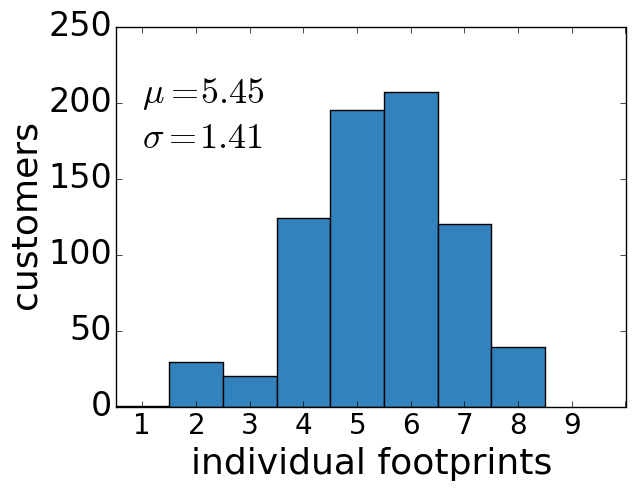

In [14]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)

set_nbr_patterns = set(individual_nbr.values())
nbr_diff_nbr_patterns = len(set_nbr_patterns)

plt.hist(individual_nbr.values(), bins=range(min(set_nbr_patterns)-1,nbr_diff_nbr_patterns,1), color='#3182bd')

plt.ylabel('customers', fontsize=26)
plt.xlabel('individual footprints', fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.xticks(np.asarray(range(min(set_nbr_patterns)-1,nbr_diff_nbr_patterns + 1,1)) + 0.5, 
           range(min(set_nbr_patterns)-1,nbr_diff_nbr_patterns,1), fontsize=20)
#plt.yticks(np.arange(0,2500,500), ['0', '0.5k', '1.0k', '1.5k', '2.0k'])

plt.text(1.5, 200, r'$\mu=%.2f$' % np.mean(individual_nbr.values()), fontsize=26)
plt.text(1.5, 170, r'$\sigma=%.2f$' % np.std(individual_nbr.values()), fontsize=26)

path_plot = './'
plt.savefig(path_plot + 'tmall_ind_dist_df.png', format='png', bbox_inches='tight')
plt.show()

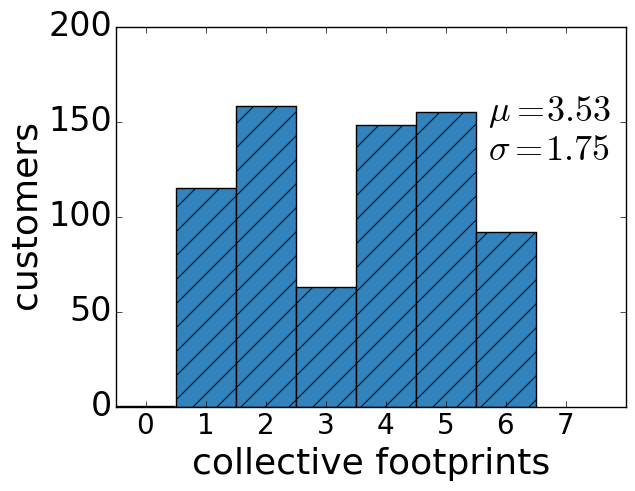

In [15]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)

set_nbr_patterns = set(collective_nbr.values())
nbr_diff_nbr_patterns = len(set_nbr_patterns)

plt.hist(collective_nbr.values(), bins=range(min(set_nbr_patterns)-1,nbr_diff_nbr_patterns,1), 
         color='#3182bd', hatch='/')

plt.ylabel('customers', fontsize=26)
plt.xlabel('collective footprints', fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.xticks(np.asarray(range(min(set_nbr_patterns)-1,nbr_diff_nbr_patterns + 1,1)) + 0.5, 
           range(min(set_nbr_patterns)-1,nbr_diff_nbr_patterns,1), fontsize=20)
plt.yticks(np.arange(0,220,50))

plt.text(6.2, 150, r'$\mu=%.2f$' % np.mean(collective_nbr.values()), fontsize=26)
plt.text(6.2, 130, r'$\sigma=%.2f$' % np.std(collective_nbr.values()), fontsize=26)

path_plot = './'
plt.savefig(path_plot + 'tmall_col_dist_df.png', format='png', bbox_inches='tight')
plt.show()

In [17]:
data = open(path + 'tafeng.json.collective_footprint.clusters', 'r')

collective_footprints = list()
for row in data:
    cf = [float(v) for v in row.strip().split(';')]
    collective_footprints.append(cf[1:])
    
data.close()

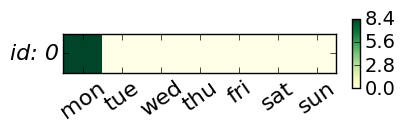

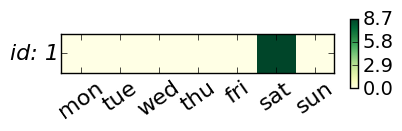

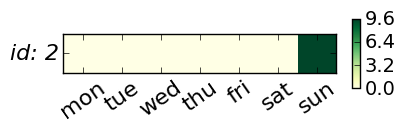

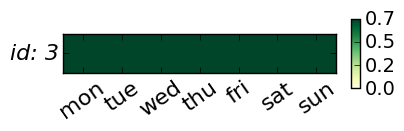

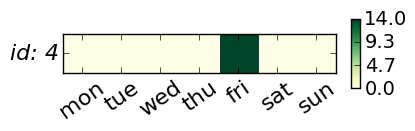

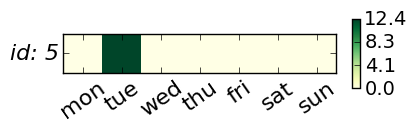

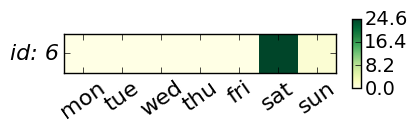

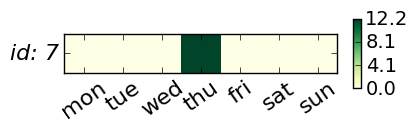

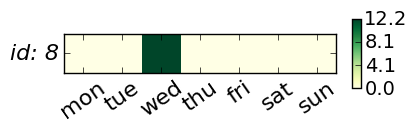

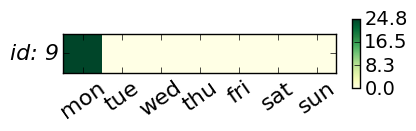

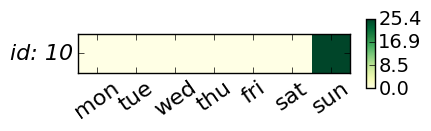

In [18]:
for cf_id in range(0, len(collective_footprints)):

    fig, ax = plt.subplots(figsize=(4, 2))
    array = np.zeros((1,7))
    array_labels = list()
    for i, v in enumerate(collective_footprints[cf_id]):
        array[0][i] = max(0, math.log(v))
        array_labels.append(v)
    
    if np.max(array) == 0.0:
        array = [0.001] * 7
        array = np.asarray(array).reshape((1, 7))
        
    heatmap = plt.imshow(array, vmin=0, interpolation='nearest', cmap=plt.cm.YlGn)
    
    cbar = plt.colorbar(heatmap, shrink=0.45, pad=0.05, fraction=0.07, orientation='vertical',
                        ticks=np.arange(0, np.max(array) + np.max(array) / 3.0, np.max(array) / 3.0), aspect=8)
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_yticklabels(['%.1f' % v for v in np.arange(0, np.max(array_labels) + np.max(array_labels) / 3.0, 
                                                           np.max(array_labels) / 3.0)])

    plt.xticks(np.arange(0,7),  ['mon', 'tue', 'wed', 'thu','fri', 'sat','sun'], fontsize=16, rotation=35)
    plt.yticks(np.arange(0, 1), ['id: %s' % (cf_id)], fontsize=16, style='italic')
    
    path_plot = './'
    plt.savefig(path_plot + 'tafeng_col_clust_cf%d.png' % cf_id, format='png', bbox_inches='tight')
    plt.show()

In [19]:
data = open(path + 'tmall.json.collective_footprint.clusters', 'r')

collective_footprints = list()
for row in data:
    cf = [float(v) for v in row.strip().split(';')]
    collective_footprints.append(cf[1:])
    
data.close()

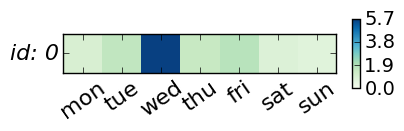

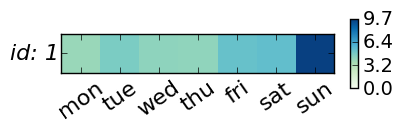

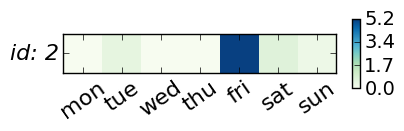

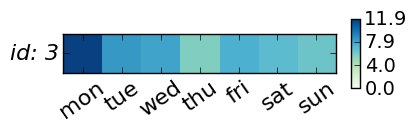

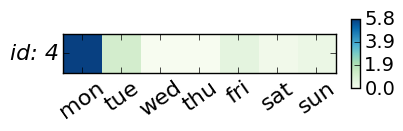

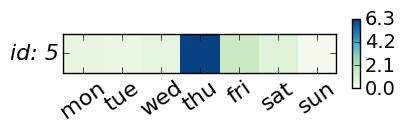

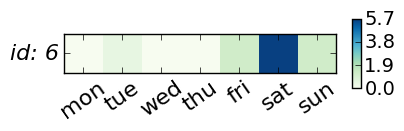

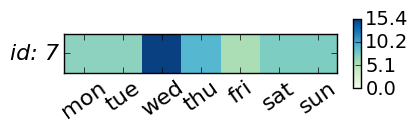

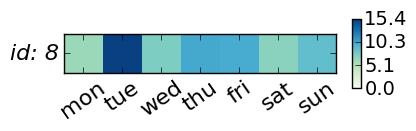

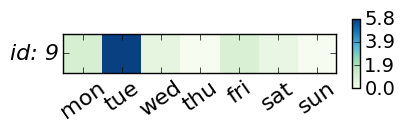

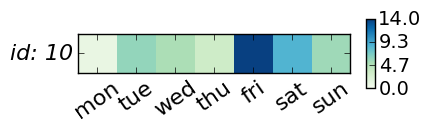

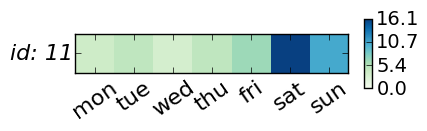

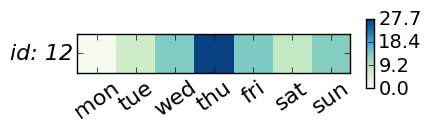

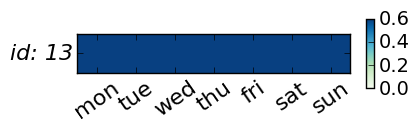

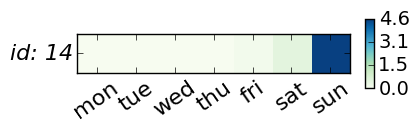

In [20]:
for cf_id in range(0, len(collective_footprints)):

    fig, ax = plt.subplots(figsize=(4, 2))
    array = np.zeros((1,7))
    array_labels = list()
    for i, v in enumerate(collective_footprints[cf_id]):
        array[0][i] = max(0.0, math.log(v))
        array_labels.append(v)
        
    if np.max(array) == 0.0:
        array = [0.001] * 7
        array = np.asarray(array).reshape((1, 7))
        
    heatmap = plt.imshow(array, vmin=0, interpolation='nearest', cmap=plt.cm.GnBu)
    
    cbar = plt.colorbar(heatmap, shrink=0.45, pad=0.05, fraction=0.07, orientation='vertical',
                        ticks=np.arange(0, np.max(array) + np.max(array) / 3.0, np.max(array) / 3.0), aspect=8)
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_yticklabels(['%.1f' % v for v in np.arange(0, np.max(array_labels) + np.max(array_labels) / 3.0, 
                                                           np.max(array_labels) / 3.0)])

    plt.xticks(np.arange(0,7),  ['mon', 'tue', 'wed', 'thu','fri', 'sat','sun'], fontsize=16, rotation=35)
    plt.yticks(np.arange(0, 1), ['id: %s' % (cf_id)], fontsize=16, style='italic')
    
    path_plot = './'
    plt.savefig(path_plot + 'tmall_col_clust_cf%d.png' % cf_id, format='png', bbox_inches='tight')
    plt.show()
    